<a href="https://colab.research.google.com/github/fkariminejadasl/bird-behavior/blob/make_features/exps/bird_behavior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

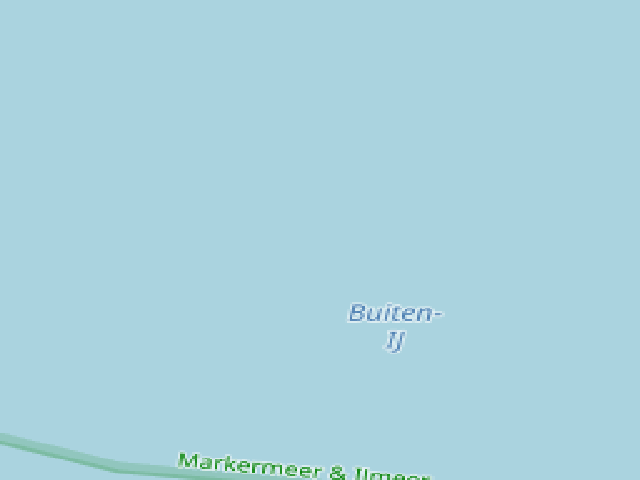

In [3]:
import requests
from PIL import Image
from io import BytesIO
import math
import numpy as np

# https://wiki.openstreetmap.org/wiki/Slippy_map_tilenames#Lon./lat._to_tile_numbers_2
def deg2num(lat_deg, lon_deg, zoom):
  lat_rad = math.radians(lat_deg)
  n = 1 << zoom # 2**zoom
  xtile = int((lon_deg + 180.0) / 360.0 * n)
  ytile = int((1.0 - math.asinh(math.tan(lat_rad)) / math.pi) / 2.0 * n)
  return xtile, ytile

def get_osm_map_image(lat, lon, zoom=15, width=640, height=480):
    base_url = "https://tile.openstreetmap.org/{}/{}/{}.png"

    # Calculate tile coordinates
    xtile, ytile = deg2num(lat, lon, zoom)

    # Construct the URL
    url = base_url.format(zoom, xtile, ytile)

    # Make the request
    headers = {"User-Agent": "YourAppName/1.0 (your@email.com)"}
    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        # Open the image using PIL
        image = Image.open(BytesIO(response.content))
        # Resize the image if needed
        image = image.resize((width, height))
        return image
    else:
        print(f"Error: {response.status_code}, {response.text}")
        return None

# Example usage:
lat, lon = 52.36977, 4.9954
# latitude = 37.7749  # Example: San Francisco
# longitude = -122.4194
map_image = get_osm_map_image(lat, lon, zoom=15)

map_image

In [4]:
image = np.array(map_image.convert('RGB'))
image[...,0], image[...,1], image[...,2]
mimage = np.mean(np.mean(image, axis=0), axis=0)
mimage

array([169.59025716, 210.73873698, 222.11263997])